In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **Performance comparison**

In [ ]:
models = [
    {"name": "U-Net(34)", "SSIM": 64.58, "ops": 2.2, "params": 24.4},
    {"name": "U-Net(50)", "SSIM": 64.70, "ops": 3.0, "params": 32.5},

    {"name": "U-Net++(34)", "SSIM": 65.19, "ops": 5.2, "params": 26.1},
    {"name": "U-Net++(50)", "SSIM": 65.14, "ops": 16.2, "params": 49.0},

    {"name": "FPN(34)", "SSIM": 61.11, "ops": 1.9, "params": 23.2},
    {"name": "FPN(50)", "SSIM": 58.35, "ops": 2.2, "params": 26.1},

    {"name": "MAnet(34)", "SSIM": 59.95, "ops": 2.3, "params": 31.8},
    {"name": "MAnet(50)", "SSIM": 61.37, "ops": 5.2, "params": 147.4},

    {"name": "DeepLabV3(34)", "SSIM": 62.1, "ops": 7.7, "params": 26.0},
    {"name": "DeepLabV3(50)", "SSIM": 62.1, "ops": 11.5, "params": 39.6},

    {"name": "DeepLabV3+(34)", "SSIM": 60.58, "ops": 2.2, "params": 22.4},
    {"name": "DeepLabV3+(50)", "SSIM": 59.98, "ops": 2.6, "params": 26.7},

    {"name": "TransUNet", "SSIM": 67.0, "ops": 18.6, "params": 61.4},

    {"name": "SegFormer", "SSIM": 64.37, "ops": 0.5, "params": 3.7},

]

ssim = [model["SSIM"] for model in models]
ops = [model["ops"] for model in models]
params = [model["params"] for model in models]
names = [model["name"] for model in models]

params_scaled = 10000 * (np.array(params) / max(params)) ** 1.5

In [ ]:
colors = {
    "U-Net": ["#228B22", "#32CD32"],
    "U-Net++": ["#800080", "#9370DB"],
    "FPN": ["#1E90FF", "#87CEFA"],
    "MAnet": ["#8B0000", "#B22222"],
    "DeepLabV3": ["#FF8C00", "#FFA500"],
    "DeepLabV3+":  ["#FFD700", "#FFFACD"],
    "SegFormer": ["#2F4F4F"],
    "TransUNet": ['#D3D3D3']
    }

model_colors = []
for model in names:
    if "U-Net" in model:
        if "U-Net++" in model:
            model_colors.append(colors["U-Net++"][0] if "34" in model else colors["U-Net++"][1])
        else:
            model_colors.append(colors["U-Net"][0] if "34" in model else colors["U-Net"][1])

    elif "FPN" in model:
        model_colors.append(colors["FPN"][0] if "34" in model else colors["FPN"][1])

    elif "MAnet" in model:
        model_colors.append(colors["MAnet"][0] if "34" in model else colors["MAnet"][1])

    elif "DeepLabV3" in model:
        if "DeepLabV3+" in model:
            model_colors.append(colors["DeepLabV3+"][0] if "34" in model else colors["DeepLabV3+"][1])
        else:
            model_colors.append(colors["DeepLabV3"][0] if "34" in model else colors["DeepLabV3"][1])

    elif "SegFormer" in model:
        model_colors.append(colors["SegFormer"][0])

    elif "TransUNet" in model:
        model_colors.append(colors["TransUNet"][0])
    else:
        model_colors.append("black")

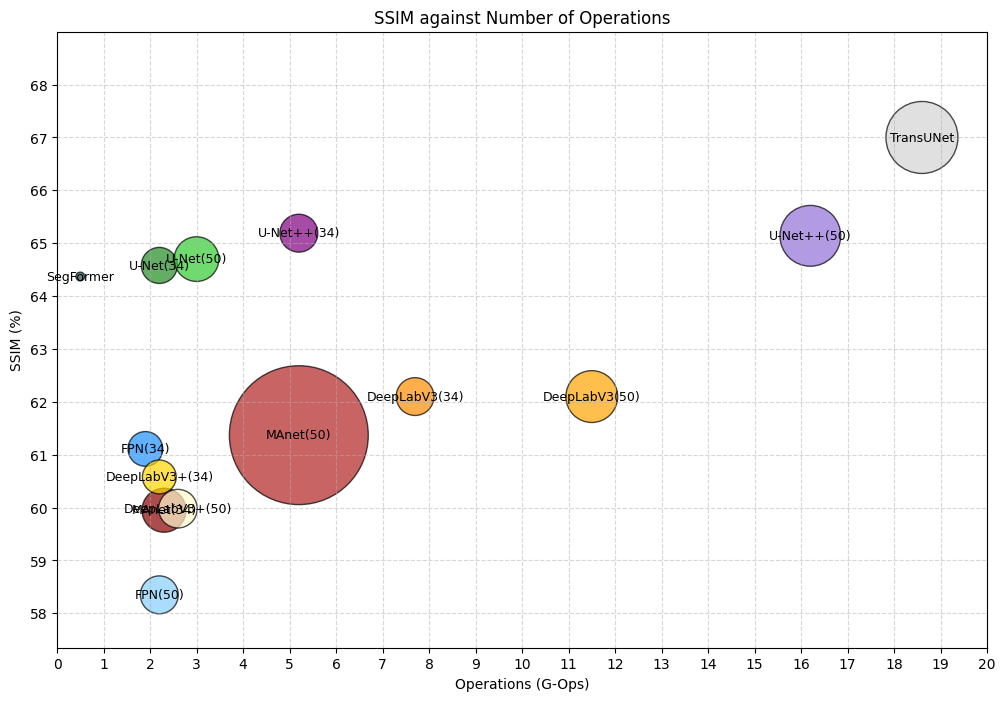

In [ ]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(ops, ssim, s=params_scaled, c=model_colors, alpha=0.7, edgecolors="k")
for i, model in enumerate(models):
    plt.annotate(model["name"], (ops[i], ssim[i]), color="black", fontsize=9, ha="center", va="center")

plt.title("SSIM against Number of Operations")
plt.xlabel("Operations (G-Ops)")
plt.ylabel("SSIM (%)")

plt.xlim(0, max(ops)+1)
plt.ylim(min(ssim)-1, max(ssim)+2)

plt.xticks(np.arange(0, int(max(ops))+3, 1))
plt.yticks(np.arange(int(min(ssim)), int(max(ssim))+2, 1))

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()